## Clustering template

### 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm.notebook import tqdm

In [2]:
random.seed(42)
np.random.seed(42)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
tqdm.pandas()
sns.set()

In [3]:
from helper_funcs import *

### 2. Reading data

In [ ]:
df = pd.read_csv('',index_col=0)

### 3. Exploring data

### 4. Feature engineering

### 5. Preparing X

In [6]:
X = np.random.randn(100,10)

In [ ]:
X = df[feats]

In [14]:
X.shape

(100, 10)

In [15]:
one_hot = False

if one_hot:
    X_out = pd.get_dummies(X)
else:
    X_out = X.copy()

In [ ]:
# normalize
std = True
if std:
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_out = scaler.fit_transform(X_out)

In [ ]:
impute = True

if impute
    from sklearn.impute import SimpleImputer 

    imputer = SimpleImputer(missing_values=np.nan, strategy='median')

    X_out = imputer.fit_transform(X_out)
    X_out = pd.DataFrame(X_out,columns=X.columns)

In [16]:
# pca
from sklearn.decomposition import PCA

X_red = PCA(n_components=2).fit_transform(X_out)

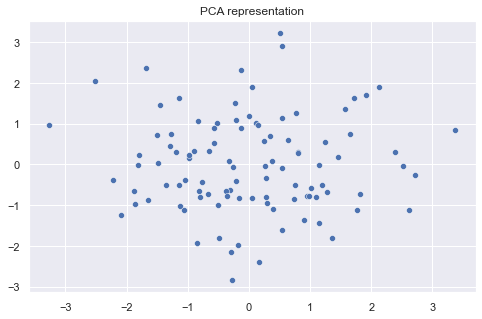

In [20]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_red[:,0],y=X_red[:,1])
plt.title('PCA representation')
plt.show()

### 6. Clustering 

#### 6.1 Kmeans

In [21]:
from sklearn.cluster import KMeans

**Elbow method**

  0%|          | 0/10 [00:00<?, ?it/s]

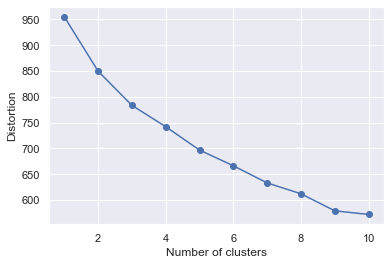

In [22]:
distortions = []
for i in tqdm(range(1, 11)):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_out)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [24]:
n_clusters = 3

kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeans.fit(X_out)

KMeans(n_clusters=3)

In [25]:
y_pred = kmeans.predict(X_out)

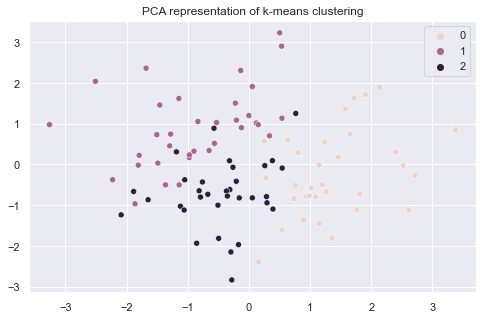

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_red[:,0],y=X_red[:,1],hue=y_pred)
plt.title('PCA representation of k-means clustering')
plt.show()

#### 6.2 DBScan

In [32]:
from sklearn.cluster import DBSCAN

db = DBSCAN(n_jobs=-1)
db.fit(X_out)

DBSCAN(n_jobs=-1)

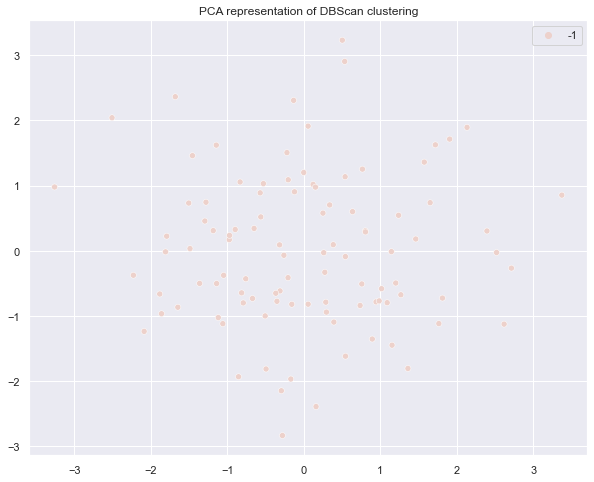

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_red[:,0],y=X_red[:,1],hue=db.labels_)
plt.title('PCA representation of DBScan clustering')
plt.show()